# Lab 03 : Loss and error rate -- solution

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully!

In [2]:
from utils import check_cifar_dataset_exists
data_path=check_cifar_dataset_exists()

train_data=torch.load(data_path+'cifar/train_data.pt')
train_label=torch.load(data_path+'cifar/train_label.pt')
test_data=torch.load(data_path+'cifar/test_data.pt')

print(train_data.size())

torch.Size([50000, 3, 32, 32])


### Make a ONE layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=True)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net. 

### We are dealing with RGB pictures that are 3 x 32 x 32 

### On picture contains a total of 3 x 32 x 32 = 3072 values

In [4]:
net=one_layer_net(3072,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=True)
)


### Choose the criterion and optimizer. Also choose:

### batchsize = 20

### learning rate = 0.01

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=20

### Do 40 passes through the training set (which contains 50,000 images -- not 60,000 like mnist!)

In [6]:
for epoch in range(40):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(50000)
 
    for count in range(0,50000,bs):
    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch       
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,3072)

        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()

        # forward the minibatch through the net 
        scores=net( inputs ) 

        # Compute the average of the losses of the data points in the minibatch
        loss =  criterion( scores , minibatch_label) 
        
        # backward pass to compute dL/dU, dL/dV and dL/dW   
        loss.backward()

        # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
        optimizer.step()
        
        # START COMPUTING STATS
        
        # add the loss of this batch to the running loss
        running_loss += loss.detach().item()
        
        # compute the error made on this batch and add it to the running error       
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    
        
        

epoch= 0 	 loss= 1.954665689086914 	 error= 69.63199994087219 percent
epoch= 1 	 loss= 1.8646688885688782 	 error= 65.13599997997284 percent
epoch= 2 	 loss= 1.836110137271881 	 error= 64.03000000476837 percent
epoch= 3 	 loss= 1.8177983387947083 	 error= 63.353999953269955 percent
epoch= 4 	 loss= 1.8070404544591903 	 error= 63.06799996614456 percent
epoch= 5 	 loss= 1.7962632564544678 	 error= 62.494000000953676 percent
epoch= 6 	 loss= 1.7927866859674453 	 error= 62.15200001239777 percent
epoch= 7 	 loss= 1.783716656923294 	 error= 61.73999993801117 percent
epoch= 8 	 loss= 1.7786528691768646 	 error= 61.7080000090599 percent
epoch= 9 	 loss= 1.776407633638382 	 error= 61.46399993658066 percent
epoch= 10 	 loss= 1.7750350419044494 	 error= 61.47400002479553 percent
epoch= 11 	 loss= 1.7649152191400528 	 error= 61.076000053882595 percent
epoch= 12 	 loss= 1.76221912317276 	 error= 61.02399995803833 percent
epoch= 13 	 loss= 1.7594321469783782 	 error= 60.89800001144409 percent
epoch=

### Choose image at random from the test set and see how good/bad are the predictions

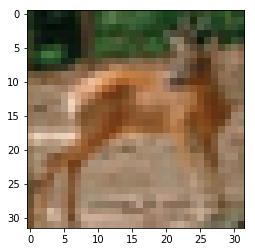

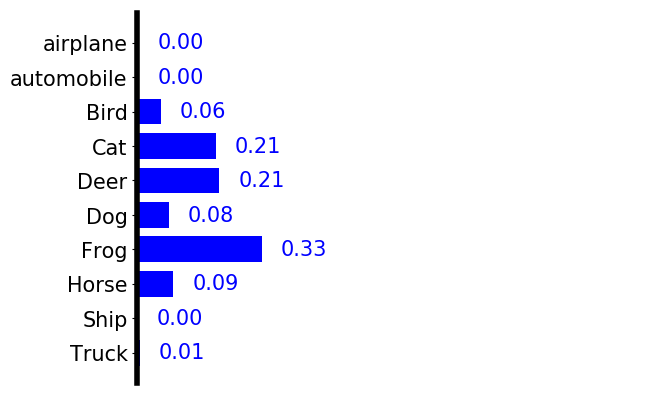

In [7]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,3072)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_cifar(probs)